<a href="https://colab.research.google.com/github/Mirco-Nani/rg_text_to_sound/blob/main/playground/mirco_nani/words2words_matcher_tests/notebook/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results Plot

### Code

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def get_results_folder():
  results_folder = os.path.join('..', 'assets', 'results')
  fallback_results_folder = 'results'
  if os.path.exists(results_folder):
    return results_folder
  else:
    return fallback_results_folder


def load_results():
  df_results = []
  results_folder = get_results_folder()
  for filename in os.listdir(results_folder):
    model_name = os.path.splitext(filename)[0]
    results_path = os.path.join(results_folder, filename)
    df_result = pd.read_csv(results_path)
    df_result["model"] = model_name
    df_results.append(df_result)
  return pd.concat(df_results)


def plot_results_metrics(df_results, metrics, y_scale=None, figsize=(30,5)):
  fig, axes = plt.subplots(nrows=1, ncols=len(metrics),figsize=figsize)
  for i,metric_name in enumerate(metrics):
    ax = axes[i]
    if y_scale != None:
      ax.set_ylim(y_scale[0], y_scale[1])
    df.pivot(index="uncertainty_threshold", columns="model", values=metric_name).plot(title=metric_name, ax=axes[i])


def plot_results(df_results):
  plot_results_metrics(df_results, ["precision","recall","accuracy","F1_score"], y_scale=(0.0, 1.0))
  plot_results_metrics(df_results, ["TP", "FP", "FN"])


### Plot

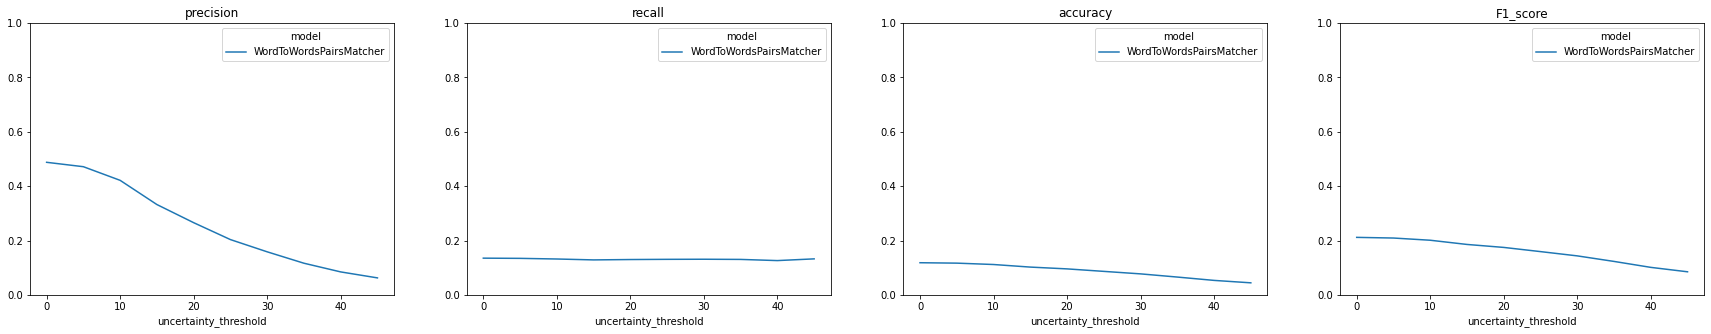

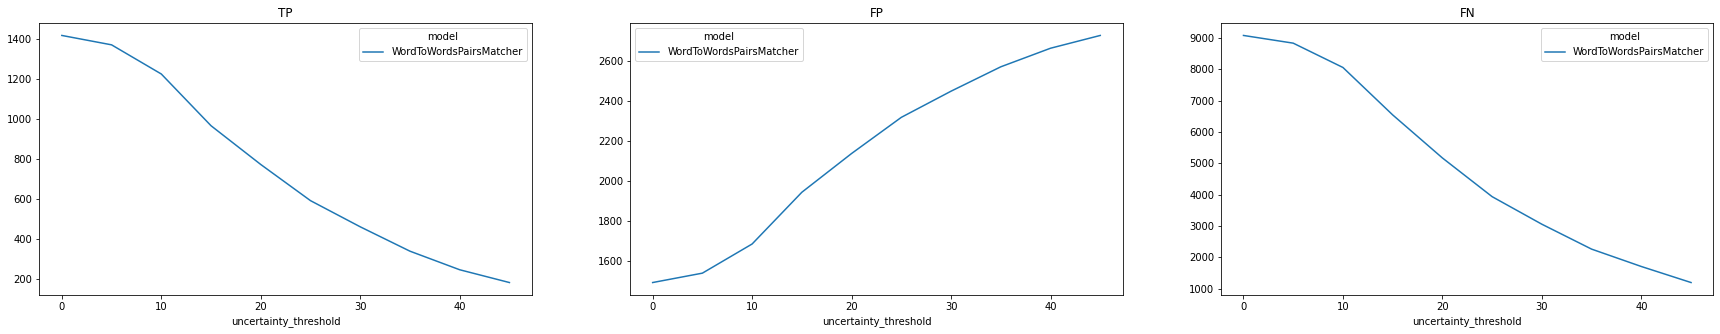

In [52]:
df=load_results()
plot_results(df)

# Dummy model test
Test to visualize results from multiple models

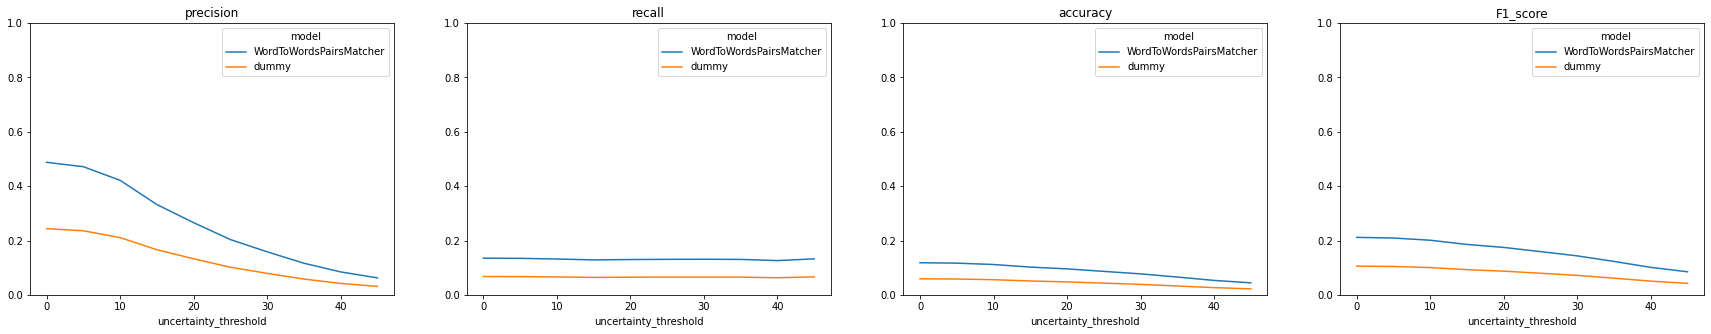

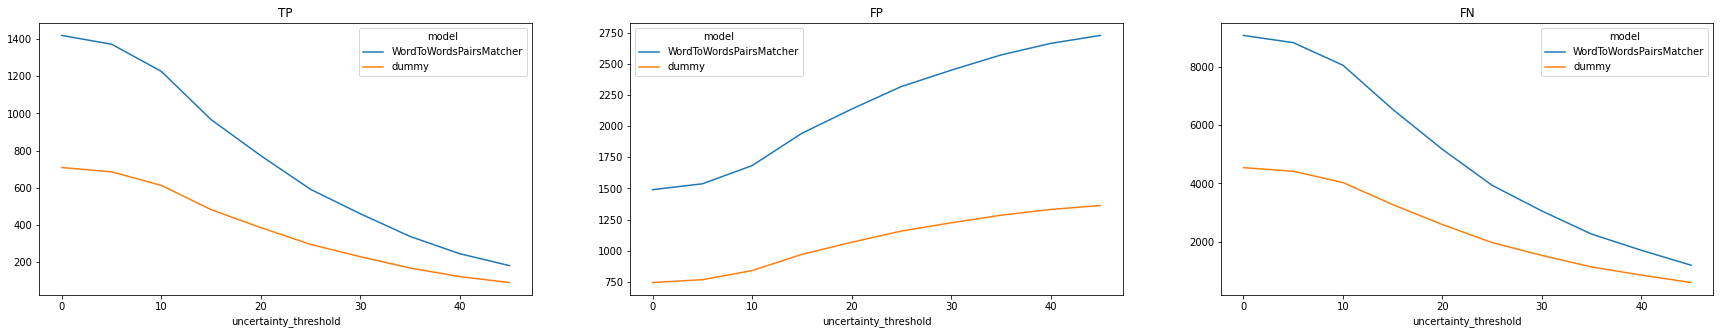

In [53]:
df_dummy = df[["TP","FP","FN","precision","recall","accuracy","F1_score"]]/2
df_dummy['uncertainty_threshold'] = df['uncertainty_threshold']
df_dummy["model"] = "dummy"
for c in ["TP","FP","FN"]:
  df_dummy[c] = df_dummy[c].astype(int)
df_dummy
df = pd.concat([df,df_dummy])
plot_results(df_dummy)